In [1]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("../data/cleaned/master_yearly_dataset.csv")
df


,year,road_crashes,road_crash_fatalities,fatal_road_crashes,private_cars,motorcycles_scooters,taxis,tsrs,goods_vehicles,buses,total_motor_vehicles,private_cars_growth,motorcycles_scooters_growth,taxis_growth,tsrs_growth,goods_vehicles_growth,buses_growth,total_motor_vehicles_growth,yearly_growth_percent,pedestrian_killed,pedestrian_injured,cyclists_killed,cyclists_injured,car_occupants_killed,car_occupants_injured,scooter_motorcycle_riders_killed,scooter_motorcycle_riders_injured,bus_passengers_killed,bus_passengers_injured,slow_moving_vehicles_killed,slow_moving_vehicles_injured,animal_driven_vehicles_killed,animal_driven_vehicles_injured,other_drivers_killed,other_drivers_injured,total_killed,total_injured
0,2014,8623,1671,1629,2629343,5297697,78686,91840,154654,40947,8293167,155256,335190,8351,5002,13712,1253,518764,6.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,8085,1622,1582,2790566,5681265,79606,81633,161821,32540,8827431,161223,383568,920,-10207,7167,-8407,534264,6.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,7375,1591,1548,2986579,6104070,91073,198137,281159,43723,9704741,196013,422805,11467,116504,119338,11183,877310,9.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,6673,1584,1565,3152710,6707891,148434,174000,231767,38265,10482757,166131,603821,57361,-24137,-49392,-5458,778016,8.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,6515,1690,1657,3334298,7185033,156793,188173,271017,39273,11204277,181588,477142,8359,14173,39250,1008,721520,6.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019,5610,1463,1433,3249670,7556002,109780,113240,330641,32218,11391551,-84628,370969,-47013,-74933,59624,-7055,187274,1.67,678.0,1887.0,36.0,108.0,39.0,281.0,496.0,2110.0,5.0,30.0,26.0,151.0,1.0,10.0,182.0,575.0,1463.0,5152.0
6,2020,4178,1196,1163,3311579,7959753,122476,114891,350876,33302,11892877,61909,403751,12696,1651,20235,1084,501326,4.40,505.0,1241.0,48.0,115.0,37.0,184.0,441.0,1613.0,5.0,18.0,21.0,110.0,2.0,9.0,132.0,372.0,1196.0,3662.0
7,2021,4720,1239,1206,3384736,8239550,112401,114869,368500,33294,12253350,73157,279797,-10075,-22,17624,-8,360473,3.03,504.0,1536.0,45.0,123.0,42.0,158.0,472.0,1868.0,3.0,12.0,18.0,145.0,0.0,7.0,155.0,424.0,1239.0,4273.0
8,2022,5652,1461,1428,2057657,5135821,85079,92149,351381,17282,7739369,-1327079,-3103729,-27322,-22720,-17119,-16012,-4513981,-36.83,629.0,1777.0,48.0,134.0,39.0,227.0,552.0,2263.0,3.0,25.0,26.0,200.0,1.0,2.0,163.0,573.0,1461.0,5201.0
9,2023,5834,1457,1432,2071115,5294900,83278,93654,385417,17232,7945596,13458,159079,-1801,1505,34036,-50,206227,2.66,622.0,1941.0,30.0,118.0,45.0,234.0,549.0,2356.0,0.0,18.0,24.0,203.0,3.0,7.0,184.0,593.0,1457.0,5470.0


In [6]:
y = df["road_crash_fatalities"]



In [7]:
exposure_features = [
    "road_crashes",
    "fatal_road_crashes",
    "total_motor_vehicles",
    "yearly_growth_percent"
]


In [8]:
vehicle_features = [
    "private_cars",
    "motorcycles_scooters",
    "goods_vehicles",
    "buses"
]


In [9]:
victim_features = [
    "pedestrian_killed",
    "cyclists_killed",
    "scooter_motorcycle_riders_killed"
]


In [10]:
features = exposure_features + vehicle_features + victim_features
X = df[features]


In [11]:
X = X.fillna(0)


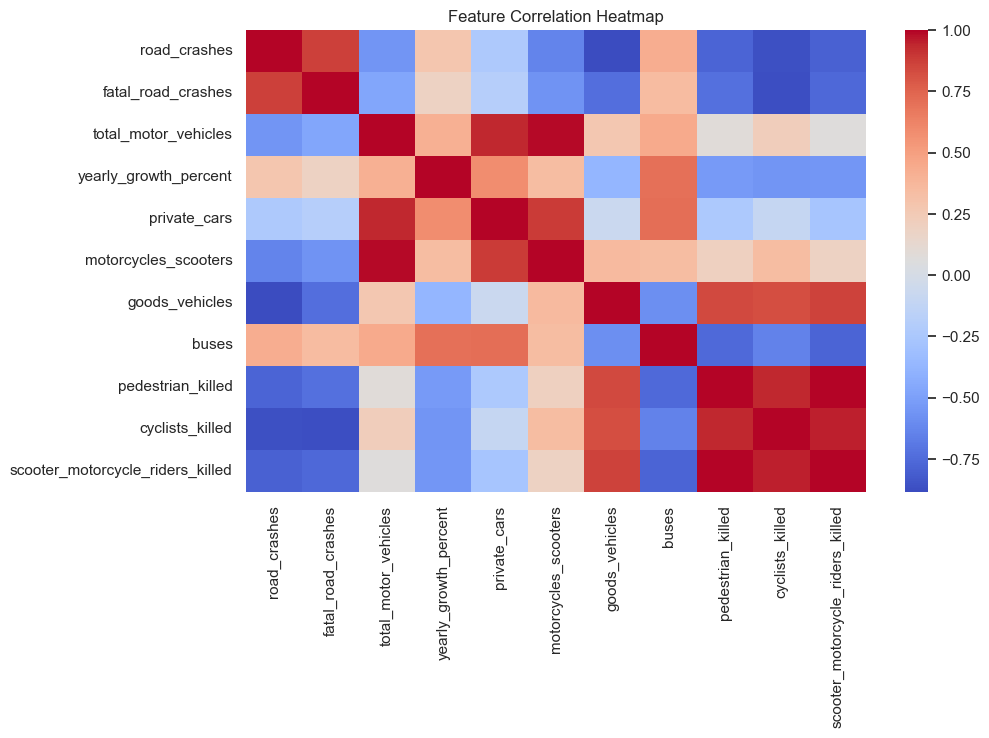

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [15]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, rmse


(-815.3496456446488, np.float64(2155.1488722715467))

In [16]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_
}).sort_values(by="coefficient", ascending=False)

coef_df


,feature,coefficient
0,road_crashes,0.110160
1,fatal_road_crashes,0.108680
4,private_cars,0.029286
6,goods_vehicles,0.020477
5,motorcycles_scooters,0.007756
3,yearly_growth_percent,-0.001178
9,cyclists_killed,-0.001607
8,pedestrian_killed,-0.011887
2,total_motor_vehicles,-0.013030
10,scooter_motorcycle_riders_killed,-0.019701


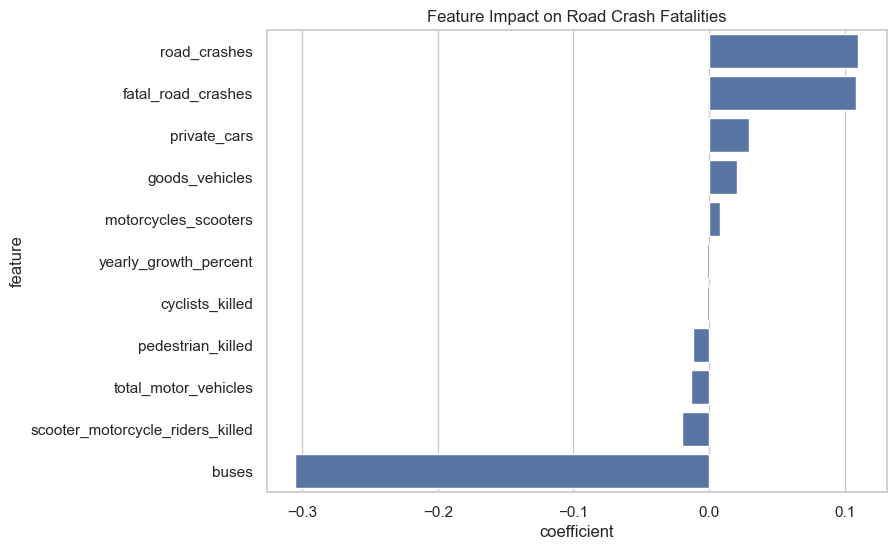

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=coef_df,
    x="coefficient",
    y="feature"
)
plt.title("Feature Impact on Road Crash Fatalities")
plt.show()
